# Capstone Project- The Battle of Neigbourhoods

# Table of contents

* Introduction
* Data
* Methodolgy
* Analysis
* Results and Discussion
* Conclusion


## Introduction

Being a Indian and Love for the Indian food allover the world is amazing but availability of Indian food and taste is not easy to find.

Switzerland is one of the famous tourist place and one of the favourite place for the Indians but the Availability of Indian food is not that much even if the location is in Downtown.

This Project will help us to find the location in switzerland (Zurich) and its nearby areas where Asian food can be available as Indian Food specifically will narrow our search.

Prior launching any restaurant, it’s important to know if the business as a good opportunity. In order to do so, this report will try to gather data about other restaurant localization, competitors and best localization.

These data could be use for a business plan afterward

## Problem

As the goal of this is to create a business plan in the end, we need to make sure data from api are correct. We also need to check that customer could be interested in this specific business.

In order to do so, a survey in Zurich will be done in addition to data gathering. I’ll go in the cities and check at different hours if restaurants are working, if streets are full and so on, and what kind of restaurant works well. This survey will allow to validate the data analysis done here.

## Interest 
This study can be used by anyone interested by opening a restaurant. Or any other business.

Maybe they will need to modify some data.

## Data

The idea of doing the project and data collection is taken from one of the tempalte shared in coursera project. I will keep the idea of clustering the city by area and then plot heatmap to find better area.

I will change some data:

Country/City: Switzerland
Goal: Open a restaurant/little shop for workers in weekday and maybe saturday
So, I will cross data from working days, and localisations.

I will use the following API:

Foursquare API: to find restaurant/venues
Google API: reverse geolocalisation

## Neighborhood Candidates

Firstly, we will  create latitude & longitude coordinates for centroids of our candidate neighborhoods. We will be create a grid of cells covering our area of interest which is aprox. 1.5km killometers centered around Zurich city center.

Let's first find the latitude & longitude of Zurich city center, using specific, well known address and Google Maps geocoding API.

We'll consider the Prefecture to be the city center, as a lot of companies are around

### Importing all the librarires and paswrds

In [68]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install shapely
import shapely.geometry

!pip install pyproj
import pyproj

import math
import warnings

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Folium installed
Libraries imported.


#### Let's assume that we are staying at the Zurich downtown (Central Plaza). So let's start by converting the Central Plaza address to its latitude and longitude coordinates.

In [2]:
address = 'Central 1, 8001 Zurich'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

47.3770836 8.543634


Now let's create a grid of area candidates, equaly spaced, centered around city center and within ~1.5km from Prefecture. Our neighborhoods will be defined as circular areas with a radius of 100 meters, so our neighborhood centers will be 200 meters apart.

To accurately calculate distances we need to create our grid of locations in Cartesian 2D coordinate system which allows us to calculate distances in meters (not in latitude/longitude degrees). Then we'll project those coordinates back to latitude/longitude degrees to be shown on Folium map

In [3]:
search_query = 'Asian food'
radius = 5000
print(search_query + ' .... OK!')

Asian food .... OK!


In [6]:
CLIENT_ID = 'ZOGYZYX4FJBVRUACLNGHYT1VAMOPMM4UEEMNN3DMXNX1CUEF' # your Foursquare ID
CLIENT_SECRET = 'GO4VKJZVNWY3ZHEL4AVRNWMPV4AQMRKV3WIRGVMPQOULXLAU' # your Foursquare Secret
ACCESS_TOKEN = '1KWTD441GWPQW30Q0ZOP5NSLION5M2SAJFRHYVCKF4K3UCLH' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 40
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ZOGYZYX4FJBVRUACLNGHYT1VAMOPMM4UEEMNN3DMXNX1CUEF&client_secret=GO4VKJZVNWY3ZHEL4AVRNWMPV4AQMRKV3WIRGVMPQOULXLAU&ll=47.3770836,8.543634&oauth_token=1KWTD441GWPQW30Q0ZOP5NSLION5M2SAJFRHYVCKF4K3UCLH&v=20180604&query=Asian food&radius=5000&limit=40'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '609eda9fc03b8b05c1812b0e'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4ec4eefbf790c16e5225be61',
    'name': 'Fo Ke Kio Asian Take Away',
    'location': {'address': 'Talacker 50A',
     'lat': 47.37214184335466,
     'lng': 8.534840510608197,
     'labeledLatLngs': [{'label': 'display',
       'lat': 47.37214184335466,
       'lng': 8.534840510608197}],
     'distance': 861,
     'cc': 'CH',
     'city': 'Zürich',
     'state': 'Zürich',
     'country': 'Schweiz',
     'formattedAddress': ['Talacker 50A', 'Zürich', 'Schweiz']},
    'categories': [{'id': '4bf58dd8d48988d142941735',
      'name': 'Asian Restaurant',
      'pluralName': 'Asian Restaurants',
      'shortName': 'Asian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1621023391',
    'hasPerk': False},
   {'id': '4e54

## We will convert this to Pandas dataframe 

In [9]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(20)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,location.neighborhood,venuePage.id
0,4ec4eefbf790c16e5225be61,Fo Ke Kio Asian Take Away,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1621023391,False,Talacker 50A,47.372142,8.534841,"[{'label': 'display', 'lat': 47.37214184335466...",861,CH,Zürich,Zürich,Schweiz,"[Talacker 50A, Zürich, Schweiz]",NaN,NaN,NaN,NaN
1,4e5407058877863330aa8874,Asian Sport Center,"[{'id': '4bf58dd8d48988d1b2941735', 'name': 'C...",v-1621023391,False,NaN,47.382676,8.547708,"[{'label': 'display', 'lat': 47.3826760023631,...",694,CH,Zürich,Zürich,Schweiz,"[Zürich, Schweiz]",NaN,NaN,NaN,NaN
2,52013213498e9178ab9e16af,Little Nooch Asian Streetfood,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1621023391,False,Hofwiesenstr. 369,47.411235,8.543783,"[{'label': 'display', 'lat': 47.41123460919642...",3801,CH,Zürich,Zürich,Schweiz,"[Hofwiesenstr. 369 (Bahnhof Oerlikon), 8050 Zü...",Bahnhof Oerlikon,8050,NaN,NaN
3,4bf6cf4b4a67c9282a7322cf,Asian Moon,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1621023391,False,Seefeldstrasse 40,47.363043,8.549531,"[{'label': 'display', 'lat': 47.36304278640203...",1625,CH,Zürich,Zürich,Schweiz,"[Seefeldstrasse 40 (at Kreuzstrasse), 8008 Zür...",at Kreuzstrasse,8008,NaN,NaN
4,5193c15b498ec560cd705c47,Asian-Wellness,"[{'id': '4bf58dd8d48988d1ed941735', 'name': 'S...",v-1621023391,False,Schaffhauserstrasse 43,47.391070,8.538933,"[{'label': 'display', 'lat': 47.39107015696727...",1596,CH,Zürich,Zürich,Schweiz,"[Schaffhauserstrasse 43, 8037 Zürich, Schweiz]",NaN,8037,NaN,NaN
5,4f5bb376e4b0090c09cda75b,YEN'S Sushi & Asian Cuisine,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",v-1621023391,False,Hallwylerstr. 43,47.371369,8.528704,"[{'label': 'display', 'lat': 47.37136901098179...",1292,CH,Zürich,Zürich,Schweiz,"[Hallwylerstr. 43, 8004 Zürich, Schweiz]",NaN,8004,NaN,NaN
6,5e0b4830456d3b000815955b,Viet Street Food,"[{'id': '4bf58dd8d48988d14a941735', 'name': 'V...",v-1621023391,False,Usteristrasse 21,47.376122,8.536371,"[{'label': 'display', 'lat': 47.376122, 'lng':...",557,CH,Zürich,Zürich,Schweiz,"[Usteristrasse 21, Zürich, Schweiz]",NaN,NaN,NaN,NaN
7,4b59ca7af964a520369828e3,India Street-Food,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1621023391,False,Langstrasse 213,47.383168,8.530197,"[{'label': 'display', 'lat': 47.383168, 'lng':...",1218,CH,Zürich,Zürich,Schweiz,"[Langstrasse 213, 8005 Zürich, Schweiz]",NaN,8005,NaN,NaN
8,4f8d5903e4b0e5ed77fe6a91,Thai Food Corner GmbH,[],v-1621023391,False,NaN,47.379329,8.535520,"[{'label': 'display', 'lat': 47.37932922752695...",660,CH,NaN,NaN,Schweiz,[Schweiz],NaN,NaN,NaN,NaN
9,5bac7c428b98fd0039448a15,Food Station,"[{'id': '4bf58dd8d48988d120951735', 'name': 'F...",v-1621023391,False,Bahnhofplatz 15,47.378204,8.535982,"[{'label': 'display', 'lat': 47.378204, 'lng':...",590,CH,NaN,NaN,Schweiz,"[Bahnhofplatz 15, Schweiz]",NaN,NaN,NaN,NaN


#### Filtering the data frame

In [10]:
## keeping only the data frames that is related to venues and locations
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.reindex(columns = filtered_columns)

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else: 
        return(categories_list)[0]['name']
    
# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,cc,city,state,country,formattedAddress,crossStreet,postalCode,neighborhood,id
0,Fo Ke Kio Asian Take Away,Asian Restaurant,Talacker 50A,47.372142,8.534841,"[{'label': 'display', 'lat': 47.37214184335466...",861,CH,Zürich,Zürich,Schweiz,"[Talacker 50A, Zürich, Schweiz]",NaN,NaN,NaN,4ec4eefbf790c16e5225be61
1,Asian Sport Center,College Gym,NaN,47.382676,8.547708,"[{'label': 'display', 'lat': 47.3826760023631,...",694,CH,Zürich,Zürich,Schweiz,"[Zürich, Schweiz]",NaN,NaN,NaN,4e5407058877863330aa8874
2,Little Nooch Asian Streetfood,Asian Restaurant,Hofwiesenstr. 369,47.411235,8.543783,"[{'label': 'display', 'lat': 47.41123460919642...",3801,CH,Zürich,Zürich,Schweiz,"[Hofwiesenstr. 369 (Bahnhof Oerlikon), 8050 Zü...",Bahnhof Oerlikon,8050,NaN,52013213498e9178ab9e16af
3,Asian Moon,Chinese Restaurant,Seefeldstrasse 40,47.363043,8.549531,"[{'label': 'display', 'lat': 47.36304278640203...",1625,CH,Zürich,Zürich,Schweiz,"[Seefeldstrasse 40 (at Kreuzstrasse), 8008 Zür...",at Kreuzstrasse,8008,NaN,4bf6cf4b4a67c9282a7322cf
4,Asian-Wellness,Spa,Schaffhauserstrasse 43,47.391070,8.538933,"[{'label': 'display', 'lat': 47.39107015696727...",1596,CH,Zürich,Zürich,Schweiz,"[Schaffhauserstrasse 43, 8037 Zürich, Schweiz]",NaN,8037,NaN,5193c15b498ec560cd705c47
5,YEN'S Sushi & Asian Cuisine,Sushi Restaurant,Hallwylerstr. 43,47.371369,8.528704,"[{'label': 'display', 'lat': 47.37136901098179...",1292,CH,Zürich,Zürich,Schweiz,"[Hallwylerstr. 43, 8004 Zürich, Schweiz]",NaN,8004,NaN,4f5bb376e4b0090c09cda75b
6,Viet Street Food,Vietnamese Restaurant,Usteristrasse 21,47.376122,8.536371,"[{'label': 'display', 'lat': 47.376122, 'lng':...",557,CH,Zürich,Zürich,Schweiz,"[Usteristrasse 21, Zürich, Schweiz]",NaN,NaN,NaN,5e0b4830456d3b000815955b
7,India Street-Food,Indian Restaurant,Langstrasse 213,47.383168,8.530197,"[{'label': 'display', 'lat': 47.383168, 'lng':...",1218,CH,Zürich,Zürich,Schweiz,"[Langstrasse 213, 8005 Zürich, Schweiz]",NaN,8005,NaN,4b59ca7af964a520369828e3
8,Thai Food Corner GmbH,None,NaN,47.379329,8.535520,"[{'label': 'display', 'lat': 47.37932922752695...",660,CH,NaN,NaN,Schweiz,[Schweiz],NaN,NaN,NaN,4f8d5903e4b0e5ed77fe6a91
9,Food Station,Food Court,Bahnhofplatz 15,47.378204,8.535982,"[{'label': 'display', 'lat': 47.378204, 'lng':...",590,CH,NaN,NaN,Schweiz,"[Bahnhofplatz 15, Schweiz]",NaN,NaN,NaN,5bac7c428b98fd0039448a15


## Lets generate the Map with the help of folium

In [11]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start =15)

#To locate the central plaza, using red mark on the map
folium.CircleMarker(
    [latitude, longitude],
    radius=20,
    color = 'red',
    popup='Central Plaza',
    fill = 'True',
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# To locate the Indian resturant, using green mark on the map
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color = 'green',
        popup = label,
        fill = 'True'
).add_to(venues_map)

venues_map

## Lets go to our near hotels of Zurich

In [12]:
#Now the above Map has all the resturants in Zurich, Now we will Locate the nearby hotels and will visulaize

search_query = 'Hotels'
radius = 5000
print(search_query + ' .... OK!')


Hotels .... OK!


In [13]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ZOGYZYX4FJBVRUACLNGHYT1VAMOPMM4UEEMNN3DMXNX1CUEF&client_secret=GO4VKJZVNWY3ZHEL4AVRNWMPV4AQMRKV3WIRGVMPQOULXLAU&ll=47.3770836,8.543634&oauth_token=1KWTD441GWPQW30Q0ZOP5NSLION5M2SAJFRHYVCKF4K3UCLH&v=20180604&query=Hotels&radius=5000&limit=40'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '609edadbe868fb6e351b87e9'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4f192576e4b00583e7aecae5',
    'name': 'Chreis 4 Hotels / Gastenhaus',
    'location': {'lat': 47.377868,
     'lng': 8.528536,
     'labeledLatLngs': [{'label': 'display',
       'lat': 47.377868,
       'lng': 8.528536}],
     'distance': 1141,
     'cc': 'CH',
     'country': 'Schweiz',
     'formattedAddress': ['Schweiz']},
    'categories': [],
    'referralId': 'v-1621023451',
    'hasPerk': False},
   {'id': '4f9b25dce4b020e60ecae7e7',
    'name': 'Chreis Hotels 4, Lodges',
    'location': {'address': 'Anwandstrasse 10',
     'lat': 47.37620385434355,
     'lng': 8.524694040843906,
     'labeledLatLngs': [{'label': 'display',
       'lat': 47.37620385434355,
       'lng': 8.524694040843906}],
     'distance': 1431,
     'cc': 'CH',
     'city': 'Zürich',
     'state': 'Zürich',
     'country': 'Schweiz',
 

In [15]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.city,location.state,location.postalCode,venuePage.id,location.crossStreet
0,4f192576e4b00583e7aecae5,Chreis 4 Hotels / Gastenhaus,[],v-1621023451,False,47.377868,8.528536,"[{'label': 'display', 'lat': 47.377868, 'lng':...",1141,CH,Schweiz,[Schweiz],NaN,NaN,NaN,NaN,NaN,NaN
1,4f9b25dce4b020e60ecae7e7,"Chreis Hotels 4, Lodges","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1621023451,False,47.376204,8.524694,"[{'label': 'display', 'lat': 47.37620385434355...",1431,CH,Schweiz,"[Anwandstrasse 10, Zürich, Schweiz]",Anwandstrasse 10,Zürich,Zürich,NaN,NaN,NaN
2,4e58f05db0fbdca309f5e43f,Hotel Scheuble,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1621023451,False,47.374447,8.544851,"[{'label': 'display', 'lat': 47.37444716313871...",307,CH,Schweiz,"[Zürich, Schweiz]",NaN,Zürich,Zürich,NaN,NaN,NaN
3,5d88688c229a2400089f4135,Hotel Schweizerhof Fitness Center,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",v-1621023451,False,47.376946,8.539385,"[{'label': 'display', 'lat': 47.376946, 'lng':...",320,CH,Schweiz,[Schweiz],NaN,NaN,NaN,NaN,NaN,NaN
4,4b39fc23f964a520046025e3,Hotel Storchen,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1621023451,False,47.371266,8.542178,"[{'label': 'display', 'lat': 47.37126567053149...",656,CH,Schweiz,"[Am Weinplatz 2, 8001 Zürich, Schweiz]",Am Weinplatz 2,Zürich,Zürich,8001,NaN,NaN


In [16]:
## keeping only the data frames that is related to venues and locations
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df_fil_hotel = dataframe.reindex(columns = filtered_columns)

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else: 
        return(categories_list)[0]['name']
    
# filter the category for each row
df_fil_hotel['categories'] = df_fil_hotel.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_fil_hotel.columns = [column.split('.')[-1] for column in df_fil_hotel.columns]

df_fil_hotel.head()

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,address,city,state,postalCode,crossStreet,id
0,Chreis 4 Hotels / Gastenhaus,None,47.377868,8.528536,"[{'label': 'display', 'lat': 47.377868, 'lng':...",1141,CH,Schweiz,[Schweiz],NaN,NaN,NaN,NaN,NaN,4f192576e4b00583e7aecae5
1,"Chreis Hotels 4, Lodges",Hotel,47.376204,8.524694,"[{'label': 'display', 'lat': 47.37620385434355...",1431,CH,Schweiz,"[Anwandstrasse 10, Zürich, Schweiz]",Anwandstrasse 10,Zürich,Zürich,NaN,NaN,4f9b25dce4b020e60ecae7e7
2,Hotel Scheuble,Hotel,47.374447,8.544851,"[{'label': 'display', 'lat': 47.37444716313871...",307,CH,Schweiz,"[Zürich, Schweiz]",NaN,Zürich,Zürich,NaN,NaN,4e58f05db0fbdca309f5e43f
3,Hotel Schweizerhof Fitness Center,Gym,47.376946,8.539385,"[{'label': 'display', 'lat': 47.376946, 'lng':...",320,CH,Schweiz,[Schweiz],NaN,NaN,NaN,NaN,NaN,5d88688c229a2400089f4135
4,Hotel Storchen,Hotel,47.371266,8.542178,"[{'label': 'display', 'lat': 47.37126567053149...",656,CH,Schweiz,"[Am Weinplatz 2, 8001 Zürich, Schweiz]",Am Weinplatz 2,Zürich,Zürich,8001,NaN,4b39fc23f964a520046025e3


In [17]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start =15)

#To locate the central plaza, using red mark on the map
folium.CircleMarker(
    [latitude, longitude],
    radius=20,
    color = 'red',
    popup='Central Plaza',
    fill = 'True',
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# To locate the Hotels, using green mark on the map
for lat, lng, label in zip(df_fil_hotel.lat, df_fil_hotel.lng, df_fil_hotel.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color = 'green',
        popup = label,
        fill = 'True'
).add_to(venues_map)

venues_map

#### Now we will create global map hotels vs Asian Resturants

In [18]:
Global_Map = folium.Map(location=[latitude, longitude], zoom_start =15)

#To locate the central plaza, using red mark on the map
folium.CircleMarker(
    [latitude, longitude],
    radius=20,
    color = 'red',
    popup='Central Plaza',
    fill = 'True',
    fill_color = 'Yellow',
    fill_opacity = 0.6
).add_to(Global_Map)

# To locate the Hotels, using green mark on the map
for lat, lng, label in zip(df_fil_hotel.lat, df_fil_hotel.lng, df_fil_hotel.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color = 'green',
        popup = label,
        fill = 'True'
).add_to(Global_Map)
# To locate the Asian Resturants, using Red mark on the map
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        color = 'red',
        popup = label,
        fill = 'True'
).add_to(Global_Map)


Global_Map

###### We will now focus on spotting worker area more than competitors, we will try do determine where are clusters more of the worker.
In order to do that, we will use the k mean clustering method.

In [19]:
# Importing librariers for Clustering
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser

%matplotlib inline 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


### Creating a dataframe to perform clustering

In [20]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '609edae610f6be63609ad736'},
 'response': {'venues': []}}

In [21]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [22]:
trending_venues_df

'No trending venues are available at the moment!'

In [23]:
import numpy as np
import pandas as pd
import json

import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
!pip install html5lib
!pip install lxml
!pip install BeautifulSoup4

print('librariers are imported')

librariers are imported


In [24]:
from pandas.io.html import read_html
url ='https://www.geonames.org/postalcode-search.html?q=&country=CH&adminCode1=ZH'
Zurich_canton = read_html(url)
print('Data downloaded!')

Data downloaded!


In [25]:
Zurich_canton[2]

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,ZÃ¼rich,8001,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
1,NaN,47.367/8.55,47.367/8.55,47.367/8.55,47.367/8.55,47.367/8.55,47.367/8.55
2,2.0,ZÃ¼rich,8002,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
3,NaN,47.367/8.55,47.367/8.55,47.367/8.55,47.367/8.55,47.367/8.55,47.367/8.55
4,3.0,ZÃ¼rich,8003,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
...,...,...,...,...,...,...,...
396,199.0,Ebertswil,8925,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Hausen am Albis
397,NaN,47.226/8.55,47.226/8.55,47.226/8.55,47.226/8.55,47.226/8.55,47.226/8.55
398,200.0,Kappel am Albis,8926,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Kappel am Albis
399,NaN,47.228/8.527,47.228/8.527,47.228/8.527,47.228/8.527,47.228/8.527,47.228/8.527


In [26]:
df_zurich_Canton = Zurich_canton[2]

In [27]:
df_zurich_Canton.iloc[::2]

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,ZÃ¼rich,8001,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
2,2.0,ZÃ¼rich,8002,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
4,3.0,ZÃ¼rich,8003,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
6,4.0,ZÃ¼rich,8004,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
8,5.0,ZÃ¼rich,8005,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
...,...,...,...,...,...,...,...
392,197.0,Aeugst am Albis,8914,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Aeugst am Albis
394,198.0,Hausen am Albis,8915,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Hausen am Albis
396,199.0,Ebertswil,8925,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Hausen am Albis
398,200.0,Kappel am Albis,8926,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Kappel am Albis


In [28]:
df_ZH_canton = df_zurich_Canton.iloc[::2]
df_ZH_canton

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3
0,1.0,ZÃ¼rich,8001,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
2,2.0,ZÃ¼rich,8002,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
4,3.0,ZÃ¼rich,8003,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
6,4.0,ZÃ¼rich,8004,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
8,5.0,ZÃ¼rich,8005,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich
...,...,...,...,...,...,...,...
392,197.0,Aeugst am Albis,8914,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Aeugst am Albis
394,198.0,Hausen am Albis,8915,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Hausen am Albis
396,199.0,Ebertswil,8925,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Hausen am Albis
398,200.0,Kappel am Albis,8926,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Kappel am Albis


In [29]:
!pip install geocoder
import geocoder

In [30]:
# Define latitude and longitude as lists.
latitude = []
longitude = []

# Loop through the City_State_Postal_Code data in the dataframe and for each postal code loop until coordicates are obtained.
for Code in df_ZH_canton['Code']:
    g = geocoder.arcgis(Code)
    print(Code, g.latlng)
    while(g.latlng is None):
        g = geocoder.arcgis(Code)
        print(Code, g.latlng)
    lat_lng_coords = g.latlng
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])

df_ZH_canton['Latitude'] = latitude
df_ZH_canton['Longitude'] = longitude

df_ZH_canton

8001 [39.55849500000005, -75.35896999999994]
8002 [39.942390000000046, -75.03218999999996]
8003 [39.90093150000007, -74.96151439999994]
8004 [39.76769000000007, -74.89097999999996]
8005 [39.77102510000003, -74.25766169999997]
8006 [39.75643500000007, -74.10825999999997]
8008 [39.56356000000005, -74.23974499999997]
8032 [39.782065000000046, -75.06427739699996]
8037 [39.63447000000008, -74.80602499999998]
8038 [39.50823280000003, -75.46115149999997]
8044 [39.76337500000005, 9.543418770000073]
8045 [39.868880700000034, -75.03791579999995]
8046 [40.01792500000005, -74.87969499999997]
8047 [39.683895000000064, 9.60137861100003]
8048 [39.97951500000005, -74.79789499999998]
8049 [39.85591500000004, -75.03513999999996]
8050 [39.72646000000003, -74.27838499999996]
8051 [39.79034500000006, -75.17560499999996]
8052 [39.95789000000008, -74.99921499999994]
8055 [39.86004500000007, -74.80268499999994]
8057 [39.96087470000003, -74.94728519999995]
8105 [39.944629500000076, -75.08741519999995]
8134 [50

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8630 None
8630 [47.78493000000003, 15.309564333000026]
8632 [47.68409500000007, 15.165107589000058]
8635 [47.65083050000004, 15.303454499000054]
8636 [47.62007372000005, 15.271015000000034]
8700 [49.80831000000006, 4.819249064000076]


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8702 None


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8702 None
8702 [47.34143500000005, 8.578001025000049]
8704 [42.26126000000005, 20.08944500000007]
8707 [47.27107500000005, 8.683769743000028]
8713 [47.28052426600004, 15.030934174000038]
8802 [40.646340000000066, -75.00204499999995]
8804 [40.65537500000005, -75.08185499999996]
8816 [40.439432200000056, -74.39760389999998]


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8833 None
8833 [40.64403500000003, -74.83345999999995]
8906 [40.52058000000005, -74.41821499999998]
8907 [47.33666000000005, 8.471833423000021]
8908 [50.842895000000055, 2.8138839230000485]


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8910 None
8910 [47.278770000000065, 8.454456953000033]
8912 [47.52844806100006, 14.633727500000077]
8913 [47.617650000000026, 14.526030562000074]
8932 [47.70040000000006, 14.64626562500007]


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8933 None
8933 [40.49758490000005, -74.44175169999994]
8954 [47.49768250000005, 14.002099741000052]
8044 [39.76337500000005, 9.543418770000073]
8104 [39.92292500000008, -75.10832999999997]
8107 [39.90252000000004, -75.07867499999998]
8113 [47.088040000000035, 15.268015966000064]
8117 [42.51600550000006, 27.25583433500003]
8118 [50.66912680000007, 12.66979083900003]
8121 [47.21190000000007, 15.316136914000026]


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8132 None


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8132 None


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8132 None
8132 [50.73758895000003, 12.586997565000047]
8132 [50.73758895000003, 12.586997565000047]
8133 [47.28891500000003, 8.715949757000033]
8136 [47.28018400000008, 8.553238000000022]
8142 [46.929906000000074, 15.44130287300004]
8143 [46.92318477100008, 15.369337888000075]
8143 [46.92318477100008, 15.369337888000075]
8156 [47.46040700000003, 8.500839940000049]
8164 [42.00201800000008, 27.660215899000036]
8165 [42.03857400000004, 27.526296037000066]
8165 [42.03857400000004, 27.526296037000066]
8173 [42.16601700000007, 27.36942603600005]
8175 [47.547765500000025, 8.473108025000045]
8182 [47.225317500000074, 15.726481010000043]
8187 [47.554535000000044, 8.435250919000055]
8194 [47.59310000000005, 8.498244183000054]
8196 [47.60969000000006, 8.502070441000058]
8248 [39.19471500000003, -74.65932499999997]


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


8310 None
8310 [39.51127980000007, -74.92335529999997]
8311 [39.337465000000066, -75.20370499999996]
8322 [39.616972400000066, -75.07658719999995]
8331 [42.24275350000005, 27.039873945000068]
8332 [39.39952000000005, -75.03356999999994]
8342 [39.486770000000035, -74.83583999999996]
8345 [39.294917600000076, -75.17606949999998]
8414 [47.54705500000006, 8.629092688000071]
8425 [47.48950000000008, 8.633836916000064]
8426 [47.48183000000006, 8.59473581800006]
8444 [46.79329716600006, 15.394452500000057]
8451 [50.81916220000005, 12.380092658000024]
8457 [42.876883434000035, 26.71525500000007]
8458 [42.876419000000055, 26.761884645000066]
8463 [46.66651000000007, 15.485890435000044]
8466 [42.73618150000004, 26.774729413000045]
8467 [42.69124685500003, 26.819733000000042]
8474 [42.599015500000064, 26.81812787100006]
8475 [42.47681176700007, 26.982327500000054]
8483 [46.76415000000003, 15.820528263000028]
8487 [42.605944220000026, 26.92847000000006]
8493 [46.78974516300008, 15.964830000000063]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3,Latitude,Longitude
0,1.0,ZÃ¼rich,8001,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich,39.558495,-75.358970
2,2.0,ZÃ¼rich,8002,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich,39.942390,-75.032190
4,3.0,ZÃ¼rich,8003,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich,39.900932,-74.961514
6,4.0,ZÃ¼rich,8004,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich,39.767690,-74.890980
8,5.0,ZÃ¼rich,8005,Switzerland,Kanton ZÃ¼rich,Bezirk ZÃ¼rich,ZÃ¼rich,39.771025,-74.257662
...,...,...,...,...,...,...,...,...,...
392,197.0,Aeugst am Albis,8914,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Aeugst am Albis,42.609850,25.948016
394,198.0,Hausen am Albis,8915,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Hausen am Albis,42.578445,26.024073
396,199.0,Ebertswil,8925,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Hausen am Albis,47.228461,8.553584
398,200.0,Kappel am Albis,8926,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Kappel am Albis,47.225150,8.516513


##### Creating the function to get the near by resturants and Hotels

In [31]:
df_Canton = df_ZH_canton[['Place','Latitude','Longitude']]
df_Canton

,Place,Latitude,Longitude
0,ZÃ¼rich,39.558495,-75.358970
2,ZÃ¼rich,39.942390,-75.032190
4,ZÃ¼rich,39.900932,-74.961514
6,ZÃ¼rich,39.767690,-74.890980
8,ZÃ¼rich,39.771025,-74.257662
...,...,...,...
392,Aeugst am Albis,42.609850,25.948016
394,Hausen am Albis,42.578445,26.024073
396,Ebertswil,47.228461,8.553584
398,Kappel am Albis,47.225150,8.516513


In [32]:
def getNearbySelectVenues(names, latitudes, longitudes):
    resturants_Category_id = '4bf58dd8d48988d142941735'
    hotel_Category_id = '4bf58dd8d48988d1fa931735'
    radius = 5000
    venues_list=[]
    v1=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
       # print(name)
        
    # create the API request URL for Resturants
        resturants_shop_url ='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(
            
            CLIENT_ID,
            CLIENT_SECRET,
            lat,
            lng,
            ACCESS_TOKEN,
            VERSION,
            resturants_Category_id,
            radius,
            LIMIT
            )
        print(resturants_shop_url)
            
            # make the get request
        resturants_results = requests.get(resturants_shop_url).json()["response"]['venues']
        
  
        # return only relevant information for each nearby Resturants venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in resturants_results])
    #print(venues_list)
        
        Hotels_shop_url ='https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}&limit={}'.format(
            
            CLIENT_ID,
            CLIENT_SECRET,
            lat,
            lng,
            ACCESS_TOKEN,
            VERSION,
            hotel_Category_id,
            radius,
            LIMIT
            )

        
        Hotels_results = requests.get(Hotels_shop_url).json()["response"]['venues']
    
       
        
    
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in Hotels_results])
    nearby_select_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    #print(nearby_select_venues)
    nearby_select_venues.columns = ['Place',
                                    'Latitude',
                                    'Longitude',
                                    'Venue',
                                    'Venue_Latitude',
                                    'Venue_Longitude',
                                    'Venue_Category']
        
    return(nearby_select_venues)

In [35]:
df_Canton_select_venues = getNearbySelectVenues(names=df_Canton['Place'],
                                                latitudes=df_Canton['Latitude'],
                                                longitudes=df_Canton['Longitude']
                                               )

https://api.foursquare.com/v2/venues/search?client_id=ZOGYZYX4FJBVRUACLNGHYT1VAMOPMM4UEEMNN3DMXNX1CUEF&client_secret=GO4VKJZVNWY3ZHEL4AVRNWMPV4AQMRKV3WIRGVMPQOULXLAU&ll=39.55849500000005,-75.35896999999994&oauth_token=1KWTD441GWPQW30Q0ZOP5NSLION5M2SAJFRHYVCKF4K3UCLH&v=20180604&categoryId=4bf58dd8d48988d142941735&radius=5000&limit=40
https://api.foursquare.com/v2/venues/search?client_id=ZOGYZYX4FJBVRUACLNGHYT1VAMOPMM4UEEMNN3DMXNX1CUEF&client_secret=GO4VKJZVNWY3ZHEL4AVRNWMPV4AQMRKV3WIRGVMPQOULXLAU&ll=39.942390000000046,-75.03218999999996&oauth_token=1KWTD441GWPQW30Q0ZOP5NSLION5M2SAJFRHYVCKF4K3UCLH&v=20180604&categoryId=4bf58dd8d48988d142941735&radius=5000&limit=40
https://api.foursquare.com/v2/venues/search?client_id=ZOGYZYX4FJBVRUACLNGHYT1VAMOPMM4UEEMNN3DMXNX1CUEF&client_secret=GO4VKJZVNWY3ZHEL4AVRNWMPV4AQMRKV3WIRGVMPQOULXLAU&ll=39.90093150000007,-74.96151439999994&oauth_token=1KWTD441GWPQW30Q0ZOP5NSLION5M2SAJFRHYVCKF4K3UCLH&v=20180604&categoryId=4bf58dd8d48988d142941735&radius=5000&lim

In [36]:
df_Canton_select_venues

,Place,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,ZÃ¼rich,39.942390,-75.032190,King Wong,39.933410,-75.030574,Chinese Restaurant
1,ZÃ¼rich,39.942390,-75.032190,Fortune Cookie,39.952392,-75.029169,Chinese Restaurant
2,ZÃ¼rich,39.942390,-75.032190,Panda Express,39.936490,-75.045586,Chinese Restaurant
3,ZÃ¼rich,39.942390,-75.032190,China King,39.903295,-75.039456,Chinese Restaurant
4,ZÃ¼rich,39.942390,-75.032190,Sushi King,39.925017,-74.999925,Sushi Restaurant
...,...,...,...,...,...,...,...
4427,NaN,18.776096,100.773935,room 115 | Nan Boutique Hotel,18.781948,100.780241,Hotel
4428,NaN,18.776096,100.773935,สระว่ายน้ำ @โรงแรมเทวราช,18.778485,100.774581,Hotel Pool
4429,NaN,18.776096,100.773935,เอ่ื้องคำเกสเฮ้าท์,18.784172,100.765993,Bed & Breakfast
4430,NaN,18.776096,100.773935,ธาดารีสอร์ท,18.786504,100.739658,Resort


In [37]:
df_Canton_select_venues.dropna()

,Place,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,ZÃ¼rich,39.94239,-75.032190,King Wong,39.933410,-75.030574,Chinese Restaurant
1,ZÃ¼rich,39.94239,-75.032190,Fortune Cookie,39.952392,-75.029169,Chinese Restaurant
2,ZÃ¼rich,39.94239,-75.032190,Panda Express,39.936490,-75.045586,Chinese Restaurant
3,ZÃ¼rich,39.94239,-75.032190,China King,39.903295,-75.039456,Chinese Restaurant
4,ZÃ¼rich,39.94239,-75.032190,Sushi King,39.925017,-74.999925,Sushi Restaurant
...,...,...,...,...,...,...,...
4348,Kappel am Albis,47.22515,8.516513,Windegg Restaurant / Hotel,47.275866,8.522236,Hotel
4349,Kappel am Albis,47.22515,8.516513,Swiss Hotel Cham,47.177768,8.504641,Hotel
4350,Kappel am Albis,47.22515,8.516513,Parkhotel Zug,47.172381,8.519150,Hotel
4351,Kappel am Albis,47.22515,8.516513,City Garden Hotel,47.173308,8.521215,Hotel


In [38]:
df_Canton_select_venues.groupby('Place').count()

,Latitude,Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
Place,,,,,,
Adliswil,5,5,5,5,5,5
Aeugst am Albis,4,4,4,4,4,4
Affoltern am Albis,8,8,8,8,8,8
Andelfingen,2,2,2,2,2,2
Au ZH,2,2,2,2,2,2
...,...,...,...,...,...,...
Zollikerberg,2,2,2,2,2,2
Zollikon,78,78,78,78,78,78
Zumikon,37,37,37,37,37,37


How many unique categories are there?

In [41]:
print('There are {} unique categories.'.format(len(df_Canton_select_venues.Venue_Category.unique())))

There are 84 unique categories.


##### Identify all other types of venues besides Resturants

In [51]:
df_Canton_other_venues = df_Canton_select_venues[~df_Canton_select_venues['Venue_Category'].isin(['Resturants','Hotel'])]

##### Use one hot encoding to translate the categorical data to numbers that we can use in calculations

In [52]:
# one hot encoding
df_Canton_other_venues_onehot = pd.get_dummies(df_Canton_other_venues[['Venue_Category']], prefix = "", prefix_sep = "")

# add Medical School Name column back to dataframe
df_Canton_other_venues_onehot['Place'] = df_Canton_other_venues['Place']

# move Medical School Name column to the first column
fixed_columns = [df_Canton_other_venues_onehot.columns[-1]] + list(df_Canton_other_venues_onehot.columns[:-1])
df_Canton_other_venues_onehot = df_Canton_other_venues_onehot[fixed_columns]

df_Canton_other_venues_onehot.head()

,Place,American Restaurant,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bar,Beach,Bed & Breakfast,Boarding House,...,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vacation Rental,Vietnamese Restaurant,Vineyard,Winery
0,ZÃ¼rich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ZÃ¼rich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ZÃ¼rich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ZÃ¼rich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ZÃ¼rich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_Canton_other_venues_onehot.shape

(3251, 84)

In [57]:
df_Canton_other_venues_grouped = df_Canton_other_venues_onehot.groupby('Place').mean().reset_index()
df_Canton_other_venues_grouped

,Place,American Restaurant,Asian Restaurant,Athletics & Sports,Austrian Restaurant,BBQ Joint,Bar,Beach,Bed & Breakfast,Boarding House,...,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vacation Rental,Vietnamese Restaurant,Vineyard,Winery
0,Adliswil,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000,0.500000,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
1,Aeugst am Albis,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
2,Affoltern am Albis,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,...,0.000000,0.00000,0.0,0.0,0.333333,0.0,0.00000,0.000000,0.0,0.0
3,Andelfingen,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
4,Au ZH,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Zollikerberg,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,...,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
129,Zollikon,0.0,0.148936,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.021277,0.00000,0.0,0.0,0.170213,0.0,0.00000,0.085106,0.0,0.0
130,Zumikon,0.0,0.178571,0.0,0.0,0.0,0.0,0.0,0.071429,0.107143,...,0.071429,0.00000,0.0,0.0,0.214286,0.0,0.00000,0.000000,0.0,0.0
131,Zwillikon,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,...,0.000000,0.00000,0.0,0.0,0.333333,0.0,0.00000,0.000000,0.0,0.0


In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Now create a new DataFrame for the top ten other restaurant venues for each Place

In [67]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Place']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind + 1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind + 1))
        
# create a new dataframe
df_Canton_venues_sorted = pd.DataFrame(columns = columns)
df_Canton_venues_sorted['Place'] = df_Canton_other_venues_grouped['Place']

for ind in np.arange(df_Canton_other_venues_grouped.shape[0]):
    df_Canton_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_Canton_other_venues_grouped.iloc[ind, :], num_top_venues)
    
df_Canton_venues_sorted.head()

,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adliswil,Bed & Breakfast,Boarding House,Winery,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
1,Aeugst am Albis,Resort,Food Court,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
2,Affoltern am Albis,Cantonese Restaurant,Thai Restaurant,Bed & Breakfast,Winery,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
3,Andelfingen,Resort,Bed & Breakfast,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
4,Au ZH,Motel,Winery,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant


#### Clustering the Cantons 
###### First import k-means and determined the best value for k using the elbow method (distortion and inertia)

In [62]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [66]:
df_Canton_other_venues_grouped_clustering = df_Canton_other_venues_grouped.drop('Place', 1)
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
k_range = range(1,21)

for k in k_range:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters = k).fit(df_Canton_other_venues_grouped_clustering)
    kmeanModel.fit(df_Canton_other_venues_grouped_clustering)
    
    distortions.append(sum(np.min(cdist(df_Canton_other_venues_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / df_Canton_other_venues_grouped_clustering.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(df_Canton_other_venues_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis =1)) / df_Canton_other_venues_grouped_clustering.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [100]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.5200051284407636
2 : 0.43791564066143496
3 : 0.3929677281328096
4 : 0.36745210653913296
5 : 0.34671981352239223
6 : 0.3068074699813218
7 : 0.28393259163025225
8 : 0.2686562835443289
9 : 0.2525586989540622
10 : 0.2409133612084409
11 : 0.23316094347865046
12 : 0.2173030329470126
13 : 0.2133002134302609
14 : 0.19865644382470862
15 : 0.19950160555093852
16 : 0.18234745856177553
17 : 0.1794373914852693
18 : 0.16939547233164895
19 : 0.16603112545760654
20 : 0.16100001679380468


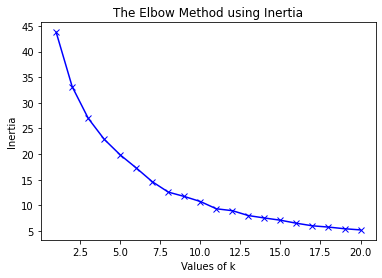

In [101]:
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [125]:
#Taking the value of K = 12 as after 12 tha value are not distorting that much
# set number of clusters
kclusters = 11
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 0).fit(df_Canton_other_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 9,  2,  6,  6, 10,  4,  2,  3,  6,  6], dtype=int32)

##### Add the cluster labels and top ten venues.

In [127]:
df_Canton_venues__merged = df_ZH_canton

df_Canton_venues__merged = df_Canton_venues__merged.join(df_Canton_venues_sorted.set_index('Place'), on = 'Place', how = 'right')

df_Canton_venues__merged.head()

,Unnamed: 0,Place,Code,Country,Admin1,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,23.0,Adliswil,8134,Switzerland,Kanton ZÃ¼rich,Bezirk Horgen,Adliswil,50.652010,12.593656,5,Bed & Breakfast,Boarding House,Winery,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
392,197.0,Aeugst am Albis,8914,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Aeugst am Albis,42.609850,25.948016,7,Resort,Food Court,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
262,132.0,Affoltern am Albis,8910,Switzerland,Kanton ZÃ¼rich,Bezirk Affoltern,Affoltern am Albis,47.278770,8.454457,5,Cantonese Restaurant,Thai Restaurant,Bed & Breakfast,Winery,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
196,99.0,Andelfingen,8450,Switzerland,Kanton ZÃ¼rich,Bezirk Andelfingen,Andelfingen,49.600795,4.923014,3,Resort,Bed & Breakfast,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
250,126.0,Au ZH,8804,Switzerland,Kanton ZÃ¼rich,Bezirk Horgen,WÃ¤denswil,40.655375,-75.081855,9,Motel,Winery,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant


#### Visualizing the Clusters

In [128]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start =15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i * x) ** 2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Canton_venues__merged['Latitude'], df_Canton_venues__merged['Longitude'], df_Canton_venues__merged['Place'], df_Canton_venues__merged['Cluster labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = rainbow[cluster - 1],
        fill_opacity = 0.7).add_to(map_clusters)
    
map_clusters

##### Defining the clusters what it look like

##### Cluster 1 contain mostly Asian resturants

In [130]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 0, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
386,194.0,Bezirk Dietikon,Birmensdorf (ZH),40.490750,-74.453345,0,Chinese Restaurant,Korean Restaurant,Asian Restaurant,Motel,Sushi Restaurant,Japanese Restaurant,Ramen Restaurant,Resort,Bed & Breakfast,Hotpot Restaurant
256,129.0,Bezirk Affoltern,Bonstetten,40.520580,-74.418215,0,Chinese Restaurant,Korean Restaurant,Motel,Resort,Thai Restaurant,Japanese Restaurant,Vietnamese Restaurant,Hostel,Sushi Restaurant,Shopping Plaza
278,140.0,Bezirk Dielsdorf,Buchs (ZH),39.902520,-75.078675,0,Chinese Restaurant,Motel,Sushi Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Resort,Bed & Breakfast,Thai Restaurant,Hostel
118,60.0,Bezirk Dielsdorf,DÃ¤llikon,39.916149,-75.069262,0,Chinese Restaurant,Japanese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Resort,Motel,Bed & Breakfast,Ramen Restaurant,Korean Restaurant,Hostel
252,127.0,Bezirk Horgen,Horgen,40.439432,-74.397604,0,Chinese Restaurant,Asian Restaurant,Resort,Thai Restaurant,Japanese Restaurant,Motel,Sushi Restaurant,Korean Restaurant,Noodle House,Hostel
98,50.0,Bezirk Horgen,Horgen,40.381802,-74.514607,0,Chinese Restaurant,Motel,Asian Restaurant,Thai Restaurant,Sushi Restaurant,Filipino Restaurant,Korean Restaurant,Hawaiian Restaurant,Gym,German Restaurant
270,136.0,Bezirk Affoltern,Maschwanden,40.497585,-74.441752,0,Chinese Restaurant,Korean Restaurant,Motel,Japanese Restaurant,Resort,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Ramen Restaurant,Sushi Restaurant
42,22.0,Bezirk Dielsdorf,Regensdorf,39.944630,-75.087415,0,Japanese Restaurant,Chinese Restaurant,Bed & Breakfast,Sushi Restaurant,Asian Restaurant,Hostel,Resort,Vietnamese Restaurant,Thai Restaurant,Ramen Restaurant
96,49.0,Bezirk Horgen,Richterswil,40.566945,-74.544345,0,Chinese Restaurant,Sushi Restaurant,Thai Restaurant,Hotel Pool,Resort,Asian Restaurant,Japanese Restaurant,Hunan Restaurant,Inn,Italian Restaurant
332,167.0,Bezirk PfÃ¤ffikon,Russikon,39.399520,-75.033570,0,Chinese Restaurant,Bed & Breakfast,Vietnamese Restaurant,Motel,Resort,Sushi Restaurant,Thai Restaurant,Japanese Restaurant,Fast Food Restaurant,Convention Center


###### Cluster 2 mostly consist of Bed & Breakfast, winery shop

In [131]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 1, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
210,106.0,Bezirk PfÃ¤ffikon,Bauma,47.369489,8.892239,1,Bed & Breakfast,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
370,186.0,Bezirk Hinwil,Fischenthal,47.332349,8.925007,1,Bed & Breakfast,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
184,93.0,Bezirk Andelfingen,Flaach,47.580950,8.601194,1,Bed & Breakfast,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
132,67.0,Bezirk Meilen,KÃ¼snacht (ZH),42.600237,27.384613,1,Bed & Breakfast,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
344,173.0,Bezirk Andelfingen,Henggart,46.793297,15.394453,1,Bed & Breakfast,Vineyard,Vacation Rental,Hostel,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space
146,74.0,Bezirk BÃ¼lach,HÃ¶ri,47.161803,15.656880,1,Bed & Breakfast,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
384,193.0,Bezirk Horgen,WÃ¤denswil,40.530520,-75.059080,1,Bed & Breakfast,Chinese Restaurant,Asian Restaurant,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
198,100.0,Bezirk Andelfingen,Marthalen,49.717915,4.458256,1,Bed & Breakfast,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
266,134.0,Bezirk Affoltern,Ottenbach,47.617650,14.526031,1,Bed & Breakfast,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
186,94.0,Bezirk Winterthur,Pfungen,46.801196,15.666280,1,Bed & Breakfast,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant


##### cluster 3 consist of Chinese resturants  

In [132]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 2, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
218,110.0,Bezirk Hinwil,Bubikon,40.220190,-74.765100,2,Chinese Restaurant,Bed & Breakfast,Asian Restaurant,Resort,Japanese Restaurant,Hotel Pool,Noodle House,Vietnamese Restaurant,Indian Restaurant,Hostel
176,89.0,Bezirk Hinwil,BÃ¤retswil,39.550565,-75.023346,2,Chinese Restaurant,College Classroom,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant,Food Court
46,24.0,Bezirk BÃ¼lach,Opfikon,47.075738,15.214893,2,Chinese Restaurant,College Classroom,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant,Food Court
226,114.0,Bezirk Hinwil,Gossau (ZH),40.217880,-74.759400,2,Chinese Restaurant,Bed & Breakfast,Resort,Japanese Restaurant,Asian Restaurant,Hotel Pool,Noodle House,Vietnamese Restaurant,Indian Restaurant,Hostel
214,108.0,Bezirk Uster,Greifensee,40.219350,-74.761635,2,Chinese Restaurant,Bed & Breakfast,Resort,Japanese Restaurant,Asian Restaurant,Hotel Pool,Noodle House,Vietnamese Restaurant,Indian Restaurant,Hostel
374,188.0,Bezirk Uster,Volketswil,40.219350,-74.761635,2,Chinese Restaurant,Bed & Breakfast,Resort,Japanese Restaurant,Asian Restaurant,Hotel Pool,Noodle House,Vietnamese Restaurant,Indian Restaurant,Hostel
346,174.0,Bezirk Andelfingen,Kleinandelfingen,50.819162,12.380093,2,Chinese Restaurant,Resort,Hunan Restaurant,Filipino Restaurant,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space
52,27.0,Bezirk BÃ¼lach,Kloten,39.425825,-75.243500,2,Chinese Restaurant,Resort,Asian Restaurant,Bed & Breakfast,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
328,165.0,Bezirk PfÃ¤ffikon,Russikon,39.616972,-75.076587,2,Chinese Restaurant,Asian Restaurant,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
216,109.0,Bezirk Uster,Uster,40.219350,-74.761635,2,Chinese Restaurant,Bed & Breakfast,Resort,Japanese Restaurant,Asian Restaurant,Hotel Pool,Noodle House,Vietnamese Restaurant,Indian Restaurant,Hostel


##### Cluster 4 Consist of Resort

In [133]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 3, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
196,99.0,Bezirk Andelfingen,Andelfingen,49.600795,4.923014,3,Resort,Bed & Breakfast,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
62,32.0,Bezirk PfÃ¤ffikon,Fehraltorf,39.389665,-75.162170,3,Resort,Motel,Filipino Restaurant,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
160,81.0,Bezirk Andelfingen,Flurlingen,39.049330,-74.762215,3,Resort,Motel,Bed & Breakfast,Hotel Pool,Beach,Sushi Restaurant,Filipino Restaurant,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant
138,70.0,Bezirk Dielsdorf,Niederhasli,42.406683,27.454225,3,Resort,Pet Service,Bed & Breakfast,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
322,162.0,Bezirk Andelfingen,Laufen-Uhwiesen,39.194715,-74.659325,3,Resort,Hostel,Bed & Breakfast,Vacation Rental,Motel,Cambodian Restaurant,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Sushi Restaurant


In [134]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 4, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
234,118.0,Bezirk Hinwil,DÃ¼rnten,47.650831,15.303454,4,Boarding House,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
84,43.0,Bezirk Meilen,Hombrechtikon,47.677910,15.316978,4,Boarding House,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
362,182.0,Bezirk Winterthur,Zell (ZH),46.764150,15.820528,4,Boarding House,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
284,143.0,Bezirk Uster,FÃ¤llanden,50.669127,12.669791,4,Boarding House,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant


In [135]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 5, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
44,23.0,Bezirk Horgen,Adliswil,50.652010,12.593656,5,Bed & Breakfast,Boarding House,Winery,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
262,132.0,Bezirk Affoltern,Affoltern am Albis,47.278770,8.454457,5,Cantonese Restaurant,Thai Restaurant,Bed & Breakfast,Winery,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
286,144.0,Bezirk Uster,FÃ¤llanden,47.211900,15.316137,5,Bed & Breakfast,Hostel,Motel,Winery,Food Court,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
352,177.0,Bezirk Andelfingen,Benken (ZH),46.666510,15.485890,5,Bed & Breakfast,Vineyard,Austrian Restaurant,Vacation Rental,Resort,Boarding House,Inn,Hostel,Winery,Beach
122,62.0,Bezirk Uster,Maur,47.243455,15.252766,5,Hostel,Bed & Breakfast,Winery,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
106,54.0,Bezirk Dietikon,Dietikon,47.380889,14.144430,5,Bed & Breakfast,Hostel,Boarding House,Resort,Vacation Rental,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run
272,137.0,Bezirk Dietikon,Geroldswil,47.497683,14.002100,5,Athletics & Sports,Bed & Breakfast,Motel,Winery,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
260,131.0,Bezirk Affoltern,Hedingen,50.842895,2.813884,5,Bed & Breakfast,Vacation Rental,Boarding House,Noodle House,Chinese Restaurant,Thai Restaurant,Sushi Restaurant,Asian Restaurant,Restaurant,Event Space
192,97.0,Bezirk Winterthur,Hettlingen,46.778400,15.456400,5,Bed & Breakfast,Vineyard,Vacation Rental,Castle,Hotel Pool,Hostel,Boarding House,Food Court,Dessert Shop,Dim Sum Restaurant
318,160.0,Bezirk BÃ¼lach,HÃ¼ntwangen,47.593100,8.498244,5,Bed & Breakfast,Resort,Thai Restaurant,Food Court,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space


##### Cluster 6 consist of Asian food

In [136]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 6, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
338,170.0,Bezirk Andelfingen,Buch am Irchel,47.547055,8.629093,6,Chinese Restaurant,Asian Restaurant,Bed & Breakfast,Gastropub,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
50,26.0,Bezirk BÃ¼lach,BÃ¼lach,42.292543,27.712295,6,Chinese Restaurant,Bed & Breakfast,Hotel Pool,Boarding House,Resort,Vacation Rental,Hotel Bar,Fast Food Restaurant,Convention Center,Cosmetics Shop
396,199.0,Bezirk Affoltern,Hausen am Albis,47.228461,8.553584,6,Thai Restaurant,Asian Restaurant,Chinese Restaurant,Sushi Restaurant,Bed & Breakfast,Swiss Restaurant,Restaurant,Boarding House,Tapas Restaurant,Hawaiian Restaurant
290,146.0,Bezirk Uster,Egg,50.737589,12.586998,6,Asian Restaurant,Gastropub,Boarding House,Sushi Restaurant,Winery,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
154,78.0,Bezirk BÃ¼lach,Eglisau,47.565185,8.532430,6,Thai Restaurant,Chinese Restaurant,Bed & Breakfast,Motel,Resort,Asian Restaurant,Hotel Pool,Hotel Bar,Cosmetics Shop,Dessert Shop
372,187.0,Bezirk Winterthur,Ellikon an der Thur,50.553920,12.087965,6,Chinese Restaurant,Gastropub,Bed & Breakfast,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
188,95.0,Bezirk BÃ¼lach,Embrach,46.792320,15.599195,6,Chinese Restaurant,Asian Restaurant,Castle,Thai Restaurant,Bed & Breakfast,Boarding House,Gastropub,Dim Sum Restaurant,Dog Run,Event Space
292,147.0,Bezirk Uster,Egg,47.288915,8.715950,6,Chinese Restaurant,Bed & Breakfast,Asian Restaurant,Thai Restaurant,Swiss Restaurant,Sushi Restaurant,Vacation Rental,Filipino Restaurant,Convention Center,Cosmetics Shop
294,148.0,Bezirk Horgen,Thalwil,47.280184,8.553238,6,Asian Restaurant,Chinese Restaurant,Thai Restaurant,Sushi Restaurant,Bed & Breakfast,Vietnamese Restaurant,Noodle House,Restaurant,Resort,Boarding House
288,145.0,Bezirk Uster,Egg,50.737589,12.586998,6,Asian Restaurant,Gastropub,Boarding House,Sushi Restaurant,Winery,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant


In [137]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 7, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
392,197.0,Bezirk Affoltern,Aeugst am Albis,42.609850,25.948016,7,Resort,Food Court,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
304,153.0,Bezirk Dielsdorf,Bachs,42.002018,27.660216,7,Resort,Food Court,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
158,80.0,Bezirk Andelfingen,Feuerthalen,39.177784,-74.819129,7,Resort,Boarding House,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
152,77.0,Bezirk BÃ¼lach,Glattfelden,47.417363,15.733533,7,Resort,Food Court,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
380,191.0,Bezirk Hinwil,Gossau (ZH),47.585744,15.269635,7,Resort,Food Court,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
310,156.0,Bezirk Dielsdorf,Neerach,42.166017,27.369426,7,Resort,Food Court,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
144,73.0,Bezirk Dielsdorf,Niederweningen,42.056608,27.662412,7,Resort,Food Court,Convention Center,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant


In [138]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 8, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,33.0,Bezirk Hinwil,Hinwil,39.437655,-74.860010,8,Hostel,Winery,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
238,120.0,Bezirk Meilen,KÃ¼snacht (ZH),49.808310,4.819249,8,Hostel,Winery,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
246,124.0,Bezirk Meilen,StÃ¤fa,47.280524,15.030934,8,Hostel,Winery,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant


In [139]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 9, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
250,126.0,Bezirk Horgen,WÃ¤denswil,40.655375,-75.081855,9,Motel,Winery,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant
228,115.0,Bezirk Hinwil,GrÃ¼ningen,42.508630,26.599035,9,Motel,Winery,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant


In [140]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 10, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
248,125.0,Bezirk Horgen,Kilchberg (ZH),40.64634,-75.002045,10,Hotel Pool,Winery,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant,Filipino Restaurant


In [141]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 11, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
148,75.0,Bezirk BÃ¼lach,BachenbÃ¼lach,47.277680,15.705073,11,Vacation Rental,Boarding House,Winery,Gastropub,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
76,39.0,Bezirk Uster,DÃ¼bendorf,50.102916,4.831965,11,Vacation Rental,Resort,Bed & Breakfast,Vietnamese Restaurant,Asian Restaurant,Chinese Restaurant,Motel,Boarding House,Campground,Filipino Restaurant
314,158.0,Bezirk BÃ¼lach,Hochfelden,47.225318,15.726481,11,Vacation Rental,Hotel Bar,Motel,Winery,Filipino Restaurant,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space
166,84.0,Bezirk BÃ¼lach,NÃ¼rensdorf,50.472514,12.611940,11,German Restaurant,Vacation Rental,Hostel,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run,Event Space,Fast Food Restaurant
104,53.0,Bezirk Dietikon,Schlieren,47.495260,14.081889,11,Hostel,Boarding House,Motel,Vacation Rental,Athletics & Sports,Hotel Pool,Winery,Filipino Restaurant,Dessert Shop,Dim Sum Restaurant
92,47.0,Bezirk Horgen,Thalwil,49.906485,4.813853,11,Vacation Rental,Boarding House,Hostel,Resort,Bed & Breakfast,Food Court,Cosmetics Shop,Dessert Shop,Dim Sum Restaurant,Dog Run


In [142]:
df_Canton_venues__merged.loc[df_Canton_venues__merged['Cluster labels'] == 12, df_Canton_venues__merged.columns[[0] + list(range(5, df_Canton_venues__merged.shape[1]))]]

,Unnamed: 0,Admin2,Admin3,Latitude,Longitude,Cluster labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


#### Results and Discussion

The analysis of whole project is summerised in following points

   1. Most of the Asian Resturants lies near the Downtown of the Zurich.
     
   2. During clustering, if we taking cluster value>11, there is no
         value that is found in that cluster visible in the last cluster
        where k = 12
        
   3. There are other resturants that are found along with Asian food resturants like American Resturants, food court, Bar, winery shop and many more.
        
   4. Cluster 1 is the downtown of the Zurich where majorly are resturants lie.
    

#### Conclusion

The Whole project lies around finding the Asian food resturants in and around Zurich. we created different cluster to identify where are majorly the Asian resturants are located and this project will help those who are looking for the same.

During the Analysis this project will be helpful to those who are looking for the food and have craving for other kind of food like Swiis food, Pizzas, Italian food, European food and of course who has love for towards t




The clusters did not work out like I had hoped they would. There were a few clusters of one medical school, and a couple of clusters were exceptionally large groups (one of which did not seem to have many venues in common). However, most of the clusters identified a fair number of schools, and they did have some other restaurant categories in common. The clusters will help in finding nearby food trucks, deli/bodegas, bakeries, sandwich places, fast food restaurants, food courts, American restaurants, Indian restaurants, wings joints, snack places, Czech restaurants, cafeterias, dim sum restaurants, diners, Eastern European restaurants, falafel restaurants, Ethiopian restaurants, empanada restaurants, and dumpling restaurants. I thought that the elbow method would reveal a more obvious value for k. I suppose I could have simply chosen a smallet value for k and forced some of the clusters to be larger, but I do not know that that would have resulted in better clusters.